In [1]:
# used in Data processing
import pandas as pd
import numpy as np
import datetime as dt

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

In [2]:
 # Machine Learning
from sklearn.model_selection import train_test_split

from pandas.tseries.holiday import USFederalHolidayCalendar

# loads data frame
df = pd.read_csv("train.csv",nrows = 50_00_000)

In [3]:
# check statistics of the given parameters
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [4]:
df.shape

(5000000, 8)

In [5]:
# Let's see the first 5 rows of our training data
df.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
# checking how many rows contain atleast a blank entry in it.
df.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    36
dropoff_latitude     36
passenger_count       0
dtype: int64

In [7]:
# data set contains some null entries. Removing them from the dataset
df = df.dropna()

In [8]:
#df.shape

In [9]:
# Now remove some of the outliers
# Plot the histogram of passenger_count
#plt.hist(df['passenger_count'], bins=np.arange(0, 10))

In [10]:
#Passengers count should range from 1 to 7, rest all are outliers let's remove them
df = df[(df.passenger_count > 0) & (df.passenger_count < 8)]

In [11]:
df.shape

(4982350, 8)

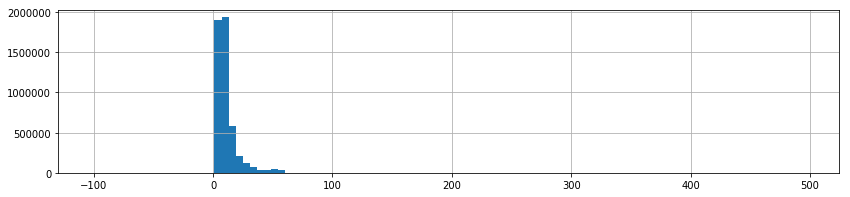

In [12]:
# Lets consider the histogram of fare_amount
df[df.fare_amount<500].fare_amount.hist(bins=100, figsize=(14,3))

In [13]:
df.shape

(4982350, 8)

In [14]:
# As we can see we have outliers for fare_amount > 60. Remove them from data set
df = df[(df.fare_amount > 0) & (df.fare_amount <= 60)]

In [15]:
df.shape

(4968604, 8)

In [16]:
# Now we now that new york city had latitude around 40.71 and longitude around -74.00 (reference : http://latitudelongitude.org/us/new-york-city/).
# So taking a rough estimate remove outliers out of range
df = df[(df.pickup_longitude > -75) & (df.pickup_longitude < -70)]
df = df[(df.dropoff_longitude > -75) & (df.dropoff_longitude < -70)]
df = df[(df.pickup_latitude > 38) & (df.pickup_latitude < 43)]
df = df[(df.dropoff_latitude > 38) & (df.dropoff_latitude < 43)]

In [17]:
df.shape

(4865432, 8)

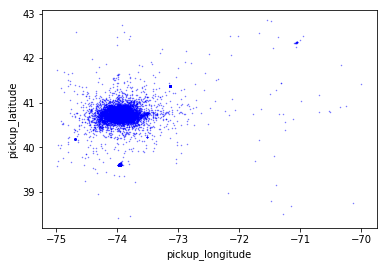

In [18]:
#Plotting scatter plot of longitude and latitude
df.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',c='blue',s=0.2,alpha=.6)

In [19]:
# Remove more outliers of latitude and longitude
df = df[(df.pickup_longitude > -74.30) & (df.pickup_longitude < -73.00)]
df = df[(df.dropoff_longitude > -74.30) & (df.dropoff_longitude < -73.00)]
df = df[(df.pickup_latitude > 40.40) & (df.pickup_latitude < 41.71)]
df = df[(df.dropoff_latitude > 40.40) & (df.dropoff_latitude < 41.71)]

In [20]:
df.shape

(4863823, 8)

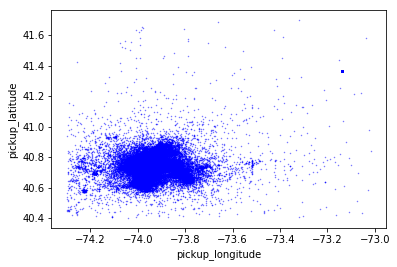

In [21]:
df.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',c='blue',s=0.2,alpha=.6)

In [22]:
# Remove more outliers of latitude and longitude
df = df[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.75)]
df = df[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.75)]
df = df[(df.pickup_latitude > 40.55) & (df.pickup_latitude < 40.85)]
df = df[(df.dropoff_latitude > 40.55) & (df.dropoff_latitude < 40.85)]

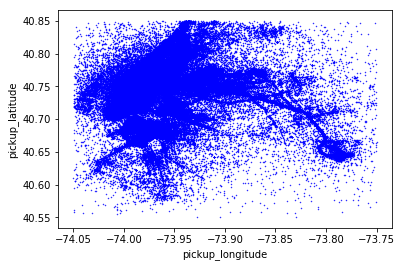

In [23]:
df.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',c='blue',s=0.2,alpha=.99)

In [24]:
#Lets calculate distance travelled in each trip using HaverSine distance
#Reference : https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
def cal_haversinedistance(pickup_lat : float, pickup_long : float, dropoff_lat : float, dropoff_long : float):
    R = 6373.0
    long_diff = dropoff_long - pickup_long
    lat_diff = dropoff_lat - pickup_lat
    
    a = sin(lat_diff / 2)**2 + cos(pickup_lat) * cos(dropoff_lat) * sin(long_diff / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [25]:
def dist_calc(df):
    R = 6373.0
    
    for i,row in df.iterrows():

        pickup_lat = radians(row['pickup_latitude'])
        pickup_long = radians(row['pickup_longitude'])
        dropoff_lat = radians(row['dropoff_latitude'])
        dropoff_long = radians(row['dropoff_longitude'])

        distance = cal_haversinedistance(pickup_lat, pickup_long, dropoff_lat, dropoff_long)
        df.at[i,'distance'] = distance

In [26]:
dist_calc(df)

In [27]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.031088
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.452786
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389961
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.800149
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999784


In [28]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
count,4.827651e+06,4.827651e+06,4.827651e+06,4.827651e+06,4.827651e+06,4.827651e+06,4.827651e+06
mean,1.103789e+01,-7.397566e+01,4.075081e+01,-7.397473e+01,4.075081e+01,1.690423e+00,3.225354e+00
std,8.755385e+00,3.367307e-02,2.649189e-02,3.176368e-02,2.934162e-02,1.306251e+00,3.399770e+00
min,1.000000e-02,-7.404989e+01,4.055018e+01,-7.404997e+01,4.055046e+01,1.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399228e+01,4.073657e+01,-7.399157e+01,4.073567e+01,1.000000e+00,1.250420e+00
50%,8.500000e+00,-7.398212e+01,4.075330e+01,-7.398069e+01,4.075375e+01,1.000000e+00,2.138349e+00
75%,1.250000e+01,-7.396847e+01,4.076741e+01,-7.396584e+01,4.076819e+01,2.000000e+00,3.847439e+00
max,6.000000e+01,-7.375001e+01,4.084999e+01,-7.375001e+01,4.085000e+01,7.000000e+00,2.878735e+01


In [29]:
df = df[~((df.fare_amount > 40) & (df.distance < 5))]

In [30]:
# Feature Engineering
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['week'] = df['pickup_datetime'].dt.week
df['month'] = df['pickup_datetime'].dt.month
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear
df['week_of_year'] = df['pickup_datetime'].dt.weekofyear
df['year'] = df['pickup_datetime'].dt.year

In [31]:
# There is no outlier in hour, day, week, month, day_of_year, week_of_year as evident from their min and max values
df.describe()


In [32]:
# Let's compute correlation coefficient 
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,week,month,day_of_year,week_of_year,year
fare_amount,1.000000,0.458470,-0.227462,0.393536,-0.215770,0.017260,0.914287,-0.013955,0.001369,0.026391,0.026601,0.026589,0.026391,0.126142
pickup_longitude,0.458470,1.000000,-0.023924,0.272631,0.053097,0.002084,0.456312,0.019801,-0.000415,0.007803,0.007588,0.007511,0.007803,0.011172
pickup_latitude,-0.227462,-0.023924,1.000000,0.073017,0.425640,-0.008415,-0.254068,0.028354,-0.002663,-0.004228,-0.004898,-0.005081,-0.004228,-0.011886
dropoff_longitude,0.393536,0.272631,0.073017,1.000000,0.110417,-0.000045,0.409930,-0.051818,-0.000299,0.006234,0.005917,0.005854,0.006234,0.008012
dropoff_latitude,-0.215770,0.053097,0.425640,0.110417,1.000000,-0.005172,-0.211630,0.022135,-0.002865,-0.004345,-0.004856,-0.005063,-0.004345,-0.007002
passenger_count,0.017260,0.002084,-0.008415,-0.000045,-0.005172,1.000000,0.011905,0.016268,0.004122,0.004404,0.004594,0.004938,0.004404,0.004889
distance,0.914287,0.456312,-0.254068,0.409930,-0.211630,0.011905,1.000000,-0.027091,0.001373,0.013376,0.013419,0.013441,0.013376,0.022895
hour,-0.013955,0.019801,0.028354,-0.051818,0.022135,0.016268,-0.027091,1.000000,0.001254,-0.004915,-0.004733,-0.004608,-0.004915,-0.000008
day,0.001369,-0.000415,-0.002663,-0.000299,-0.002865,0.004122,0.001373,0.001254,1.000000,0.044756,-0.015682,0.067058,0.044756,-0.009569
week,0.026391,0.007803,-0.004228,0.006234,-0.004345,0.004404,0.013376,-0.004915,0.044756,1.000000,0.975111,0.976771,1.000000,-0.123089


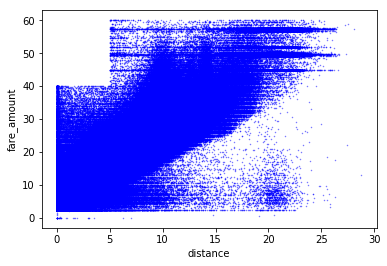

In [33]:
# Let's check some relationships:
# (1) fare_amount and distance
df.plot(kind='scatter',x='distance',y='fare_amount',c='blue',s=0.2,alpha=.6)

In [34]:
df['fare_amount'].corr(df['distance'])
# Linear Plot and correlation factor of 0.88 signifies linear relationship between fare_amount and distance travelled in a trip. The fare gets increased with the distance travelled.

0.9142873503796988

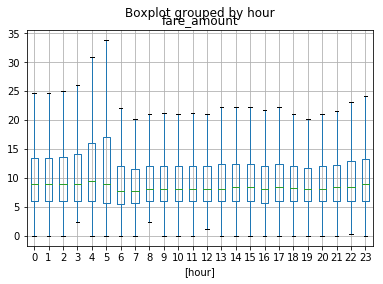

In [35]:
# (2) fare_amount and day of time
df[['fare_amount', 'hour']].boxplot(by = 'hour', showfliers = False)

In [36]:
df['fare_amount'].corr(df['hour'])
# Findings : 1) Correlation factor = -0.01607561723255814 which does not implies any relation betweem fare_amount and hour.
# max fare_amount is in the morning at 5 am which keeps on decreasing till 7 am and it remains almost constant theroughout the day. Morning high fares 
#may be due to the fact of people going to/from airport.

-0.013955057562161444

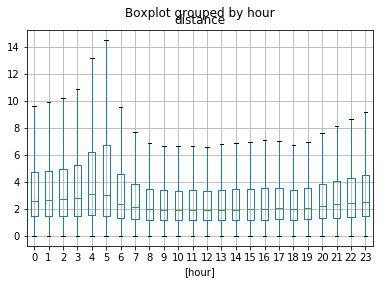

In [37]:
# (3) distance and day of time
df[['distance', 'hour']].boxplot(by = 'hour', showfliers = False)

In [38]:
df['distance'].corr(df['hour'])
# Findings : 1) Correlation factor = -0.029914726054103426 which does not implies any relation betweem distance and hour.
# max_distance travelled is in the morning at 5 am may be due to the same fact of taxi going to/from airport. So there is no significant relation betweem distance and day of time. 

-0.027091010165026273

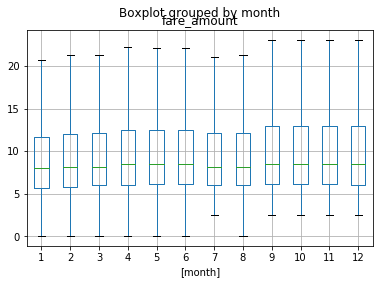

In [39]:
df[['fare_amount', 'month']].boxplot(by = 'month', showfliers = False)
#It shows the maximum fare received in the months of may and June due to summer vacations. Also the maximum fare is received in the months of October
#to december may be to the new year.

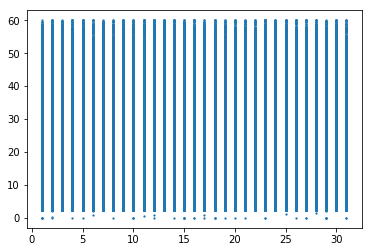

In [40]:
plt.scatter(x=df['day'], y=df['fare_amount'], s=1.5)
#No correlation between date and fare_amount

In [41]:
    def populateAirportDataSet(data):
        jfk_coord = (40.639722, -73.778889)
        ewr_coord = (40.6925, -74.168611)
        lga_coord = (40.77725, -73.872611)
        mylist = []
        for i,row in data.iterrows():
            pickup_lat = radians(row['pickup_latitude'])
            dropoff_lat = radians(row['dropoff_latitude'])
            pickup_lon = radians(row['pickup_longitude'])
            dropoff_lon = radians(row['dropoff_longitude'])
            #print('vivek')
            pickup_jfk = cal_haversinedistance(pickup_lat, pickup_lon, jfk_coord[0], jfk_coord[1]) 
            dropoff_jfk = cal_haversinedistance(jfk_coord[0], jfk_coord[1], dropoff_lat, dropoff_lon) 
            pickup_ewr = cal_haversinedistance(pickup_lat, pickup_lon, ewr_coord[0], ewr_coord[1])
            dropoff_ewr = cal_haversinedistance(ewr_coord[0], ewr_coord[1], dropoff_lat, dropoff_lon) 
            pickup_lga = cal_haversinedistance(pickup_lat, pickup_lon, lga_coord[0], lga_coord[1]) 
            dropoff_lga = cal_haversinedistance(lga_coord[0], lga_coord[1], dropoff_lat, dropoff_lon) 
            if(pickup_jfk < 2 or dropoff_jfk < 2 or pickup_ewr < 2 or dropoff_ewr < 2 or pickup_lga < 2 or dropoff_lga < 2):
                mylist.append(1)
            else:
                mylist.append(0)
        return mylist

In [42]:
df['isAirportRide'] = populateAirportDataSet(df)

In [43]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,week,month,day_of_year,week_of_year,year,isAirportRide
count,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4.816588e+06,4816588.0
mean,1.094843e+01,-7.397574e+01,4.075086e+01,-7.397480e+01,4.075085e+01,1.690647e+00,3.230506e+00,1.351978e+01,1.571701e+01,2.546496e+01,6.269116e+00,1.753048e+02,2.546496e+01,2.011739e+03,0.0
std,8.560810e+00,3.343625e-02,2.640386e-02,3.150210e-02,2.926771e-02,1.306435e+00,3.401233e+00,6.504249e+00,8.684374e+00,1.494863e+01,3.436639e+00,1.048094e+02,1.494863e+01,1.865292e+00,0.0
min,1.000000e-02,-7.404989e+01,4.055018e+01,-7.404996e+01,4.055046e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.009000e+03,0.0
25%,6.000000e+00,-7.399228e+01,4.073660e+01,-7.399156e+01,4.073572e+01,1.000000e+00,1.253646e+00,9.000000e+00,8.000000e+00,1.300000e+01,3.000000e+00,8.500000e+01,1.300000e+01,2.010000e+03,0.0
50%,8.500000e+00,-7.398213e+01,4.075332e+01,-7.398070e+01,4.075377e+01,1.000000e+00,2.141089e+00,1.400000e+01,1.600000e+01,2.400000e+01,6.000000e+00,1.670000e+02,2.400000e+01,2.012000e+03,0.0
75%,1.250000e+01,-7.396850e+01,4.076743e+01,-7.396586e+01,4.076821e+01,2.000000e+00,3.851992e+00,1.900000e+01,2.300000e+01,3.900000e+01,9.000000e+00,2.670000e+02,3.900000e+01,2.013000e+03,0.0
max,6.000000e+01,-7.375001e+01,4.084999e+01,-7.375001e+01,4.085000e+01,7.000000e+00,2.878735e+01,2.300000e+01,3.100000e+01,5.300000e+01,1.200000e+01,3.660000e+02,5.300000e+01,2.015000e+03,0.0


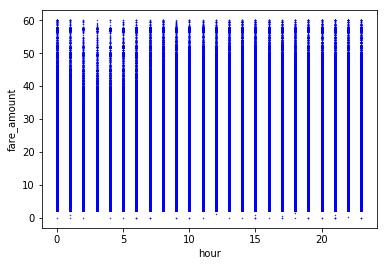

In [44]:
df.plot(kind='scatter',x='hour',y='fare_amount',c='blue',s=0.2,alpha=.99)

In [45]:
test = pd.read_csv('test.csv')


In [46]:
USFederal_Holidays = USFederalHolidayCalendar().holidays(start='2005-01-01', end='2017-12-31').to_pydatetime()

USFederal_Holidays = USFederal_Holidays.tolist()

def IsUSFederalHoliday(data):
    date = data['pickup_datetime']
    if date in USFederal_Holidays:
        return 1
    else:
        
        return 0

In [47]:
df['is_holiday'] = df.apply(IsUSFederalHoliday,axis = 1)

In [48]:
# Modelling of data

In [49]:
feature_names = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance', 'hour', 'year', 'isAirportRide', 'is_holiday']
label_name = 'fare_amount'
x_train = df[feature_names]
y_train = df[label_name]
test = pd.read_csv('test.csv')
dist_calc(test)
test['hour'] = pd.to_datetime(test['pickup_datetime']).dt.hour
test['year'] = pd.to_datetime(test['pickup_datetime']).dt.year
test['isAirportRide'] = populateAirportDataSet(test)
test['is_holiday'] = test.apply(IsUSFederalHoliday,axis = 1)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [51]:
#Random Forest Model
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train,y_train, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(x_train1, y_train1)
rfr_prediction = rfr.predict(x_test1)

#rfr_submission = pd.DataFrame({"key": test['key'],"fare_amount": rfr_prediction},columns = ['key','fare_amount'])
rmse = np.sqrt(mean_squared_error(rfr_prediction,y_test1))
print ("root mean Squared Error : {}".format(rmse))

root mean Squared Error : 2.740465470517641


In [52]:
xtest = test[feature_names]
rfr.fit(x_train, y_train)
rfr_prediction = rfr.predict(xtest)

In [53]:
submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = rfr_prediction
submission.to_csv('vivek_submission.csv', index=False)


In [54]:
# Linear Regression
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train,y_train, test_size=0.2)
linear_reg = LinearRegression()
linear_reg.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
print(linear_reg.coef_)

[ 1.42244609e+01  3.94576281e+00  6.75630186e+00 -1.22194397e+01
  3.94864599e-02  2.19223575e+00  1.35045531e-02  4.83529209e-01
  0.00000000e+00 -6.60865977e-01]


In [56]:
y_pred = linear_reg.predict(x_test1)

In [57]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test1))
print ("root mean Squared Error : {}".format(rmse))

root mean Squared Error : 3.3033718199477162
